In [ ]:
# default_exp data

In [ ]:
import nbdev.showdoc as literacy

In [ ]:
#export
from speechsep.imports import *
from speechsep.core import *
from speechsep.masks import *

/home/cerberus/.anaconda3/envs/fai2/lib/python3.7/site-packages/fastcore/basics.py:790: UserWarning: `patch_property` is deprecated and will be removed; use `patch(as_prop=True)` instead
  warnings.warn("`patch_property` is deprecated and will be removed; use `patch(as_prop=True)` instead")


In [ ]:
fn = Path("/home/cerberus/Music/LibriSpeech/test-clean/")

# DataBlocks
> DataBlock Examples for audio classification and mask generation

In [ ]:
#export
audio_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('audio/'))

def get_audio_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=audio_extensions, recurse=recurse, folders=folders)

def AudioBlock(cls=AudioMono): return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)

# Classification DataBlocks

## AudioBlock

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label,
                  item_tfms=(Resample(22048), Clip(5)))

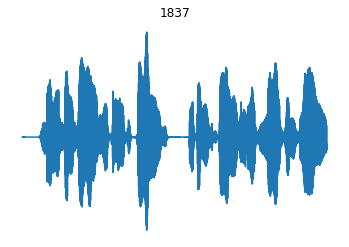

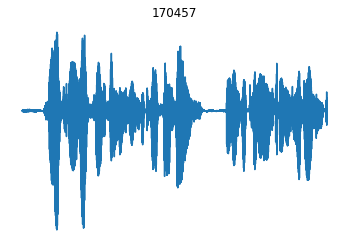

In [ ]:
dls = data.dataloaders(fn, bs=2)

dls.show_batch()

## SpecBlock

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label,
                  item_tfms=(Resample(22048), Clip(5), Spectify(), PhaseManager()))

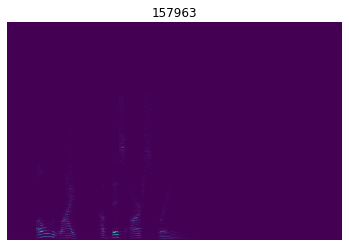

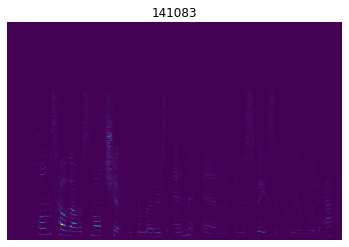

In [ ]:
dls = data.dataloaders(fn, bs=2)

dls.show_batch()

## DecBlock

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label,
                  item_tfms=(Resample(22048), Clip(5), Spectify(), Decibelify(), PhaseManager()))

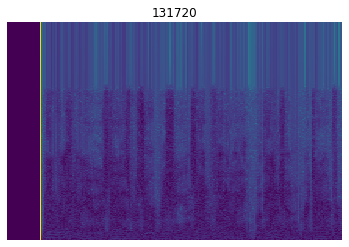

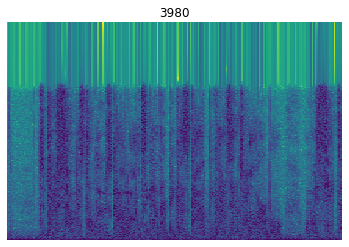

In [ ]:
dls = data.dataloaders(fn, bs=2)

dls.show_batch()

## MelBlock

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label,
                  item_tfms=(Resample(22048), Clip(5), Mel_Binify_lib()))

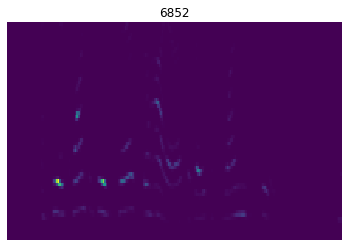

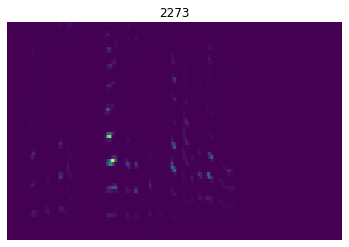

In [ ]:
dls = data.dataloaders(fn, bs=2)

dls.show_batch()

## Mel-bin/Decibel Block

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label,
                  item_tfms=(Resample(22048), Clip(5), Decibelify(), Mel_Binify_lib()))

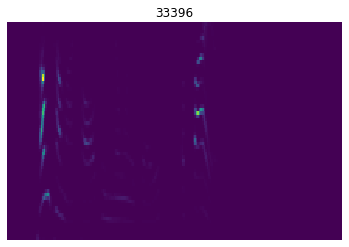

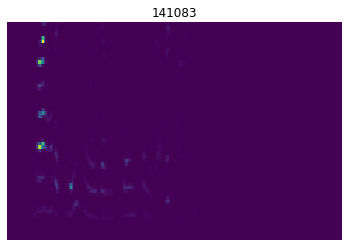

In [ ]:
dls = data.dataloaders(fn, bs=2)

dls.show_batch()

### MFCCBlock

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label,
                  item_tfms=(Resample(22048), Clip(5), MFCCify()))

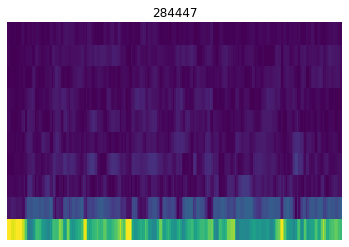

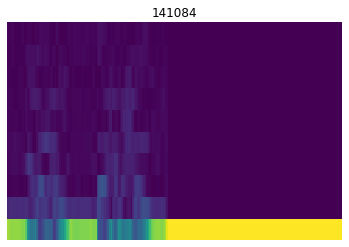

In [ ]:
dls = data.dataloaders(fn, bs=2)

dls.show_batch()